# IMPORTING THE LIBRARIES

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [47]:
# df = pd.read_csv("HeartAttack (1).csv")  # there are values with ? in our dataset 
df = pd.read_csv("HeartAttack (1).csv", na_values="?")  # Importing the csv file, "(na_values="?")" replaces "?" with "nan" value 

# ANALYSIS AND CLEANING OF THE DATASET

In [48]:
df.head() #displays top 5 data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [49]:
df.tail()  #displays bottom 5 data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1
293,65,1,4,130.0,275.0,0.0,1.0,115.0,1.0,1.0,2.0,NaN,NaN,1


In [50]:
df.info()  # info of the dataset like if there are any null values are present or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    293 non-null    float64
 4   chol        271 non-null    float64
 5   fbs         286 non-null    float64
 6   restecg     293 non-null    float64
 7   thalach     293 non-null    float64
 8   exang       293 non-null    float64
 9   oldpeak     294 non-null    float64
 10  slope       104 non-null    float64
 11  ca          3 non-null      float64
 12  thal        28 non-null     float64
 13  num         294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [51]:
df.isnull().sum() #sum of the null values present in each column

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [52]:
df["age"].unique()  # prints all the unique age of the people
df["age"].mean()    # mean of all the ages present in the dataset 

47.826530612244895

In [53]:
df.describe()   # provides basic statistical data of our dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,3.0,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,0.0,5.642857,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,0.0,1.615074,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


In [54]:
df.drop(["thal", "ca", "slope"], axis=1, inplace=True)  # drops the following columns

In [55]:
df.head() # again checking the top 5 data to verify whether the columns are dropped or not

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0


In [56]:
df = df.dropna()  # dropping all the null or nan values from our dataset

In [57]:
df.head()
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64

NOW OUR DATA HAS NO NULL VALUES

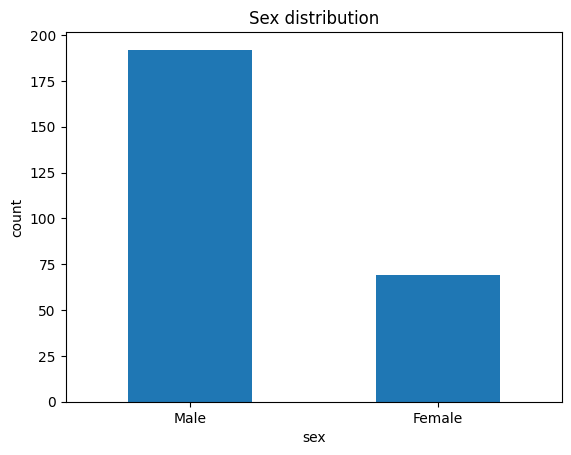

In [58]:
ax = df["sex"].value_counts().plot(kind='bar')   #counts the male and female numbers and plots a bar graph
plt.xlabel('sex')  # x-axis - sex
plt.ylabel('count')  # y-axis - count
plt.title("Sex distribution")  # title of the chart
ax.set_xticklabels(['Male', 'Female'], rotation=0)  # setting the labels
plt.show()

In [59]:
df["cp"].value_counts()  # checking chest pain category

# chatgpt convention for chest pain
# Typical angina: Chest pain related to decreased blood supply to the heart.
# Atypical angina: Chest pain not related to heart disease.
# Non-anginal pain: Chest pain that is not associated with the heart.
# Asymptomatic: No chest pain.

cp
4    113
2     92
3     46
1     10
Name: count, dtype: int64

In [60]:
df["restecg"].value_counts()  # checking resting electrocardiographic category

# chatgpt convention for restecg
# 0: Normal
# 1: Having ST-T wave abnormality (e.g., T wave inversions and/or ST elevation or depression of > 0.05 mV)
# 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

restecg
0.0    208
1.0     47
2.0      6
Name: count, dtype: int64

In [61]:
df["fbs"].value_counts()  # checking fasting blood sugar

# chatgpt convention for restecg
# 1: Fasting blood sugar is greater than 120 mg/dL, indicating high blood sugar levels.
# 0: Fasting blood sugar is 120 mg/dL or less, indicating normal blood sugar levels.

fbs
0.0    242
1.0     19
Name: count, dtype: int64

In [62]:
df = pd.get_dummies(df, columns=["cp", "restecg"]) # performing one-hot encoding

In [63]:
df.head() # again checking the top 5 data to verify whether the code excuted correctly or not

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0.0,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,False,True,False,False,False,False,True
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,False,True,False,False,True,False,False
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,True,False,False,False,False,True,False
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,False,True,False,False,False,True,False
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,False,True,False,False,True,False,False


In [64]:
df = df.rename(columns={"num       ":"result", "cp_1":"cp1", "cp_2":"cp2","cp_3":"cp3","cp_4":"cp4", "restecg_0.0":"restecg0", "restecg_1.0":"restecg1","restecg_2.0":"restecg2"})

# STANDARDIZATION OF THE COLUMNS FOR BETTER PERFORMANCE

In [65]:
scaler = StandardScaler()

numerical_cols = ["age", "trestbps", "chol", "thalach","oldpeak"]  # putting numerical columns in one list
category_cols = list(set(df.columns) - set(numerical_cols) - {"result"}) # putting categorical columns in one list by deletingn the numerical column from our dataframe
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])   #Noramlization of dataset of numerical columns
print(category_cols) 

['restecg0', 'cp2', 'exang', 'restecg2', 'cp4', 'restecg1', 'cp3', 'sex', 'cp1', 'fbs']


In [66]:
print(numerical_cols)  # printing numerical columns

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [67]:
df.head()  

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,result,cp1,cp2,cp3,cp4,restecg0,restecg1,restecg2
0,-2.525820,1,-0.149347,-1.782424,0.0,1.930425,0.0,-0.658254,0,False,True,False,False,False,False,True
1,-2.398061,1,-0.715089,-0.088855,0.0,0.876100,0.0,-0.658254,0,False,True,False,False,True,False,False
3,-2.270301,0,2.113621,-0.180399,0.0,1.297830,0.0,-0.658254,0,True,False,False,False,False,True,False
4,-2.142542,0,-1.846574,-0.455032,0.0,0.454370,0.0,-0.658254,0,False,True,False,False,False,True,False
5,-2.014782,0,-1.563703,-0.775437,0.0,1.086965,0.0,-0.658254,0,False,True,False,False,True,False,False


In [68]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)  # splitting train and test data

In [69]:
len(df_train), len(df_test)  #checking length of test and train data

(208, 53)

In [77]:
def get_features_and_target_arrays(df, numerical_cols, category_cols, scaler):
    # x_numeric_scales = scaler.fit_transform(df[numerical_cols])  
    x_numeric_scales = df[numerical_cols]
    x_categorical = df[category_cols].to_numpy()
    x = np.hstack((x_categorical, x_numeric_scales)) #concatenate type ka add kr dega dono ko (horizontal stacking)
    y = df["result"]
    return x, y

In [73]:
df.head(3)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,result,cp1,cp2,cp3,cp4,restecg0,restecg1,restecg2
0,-2.525820,1,-0.149347,-1.782424,0.0,1.930425,0.0,-0.658254,0,False,True,False,False,False,False,True
1,-2.398061,1,-0.715089,-0.088855,0.0,0.876100,0.0,-0.658254,0,False,True,False,False,True,False,False
3,-2.270301,0,2.113621,-0.180399,0.0,1.297830,0.0,-0.658254,0,True,False,False,False,False,True,False


In [76]:
y = df["result"]
X = df.drop(["result"], axis=1)

# Machine Learning Models To Find The Accuracy Of The Model

In [78]:
x_train, y_train = get_features_and_target_arrays(df_train, numerical_cols, category_cols, scaler)
x_test, y_test = get_features_and_target_arrays(df_test, category_cols, numerical_cols, scaler)
df.head(1)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,result,cp1,cp2,cp3,cp4,restecg0,restecg1,restecg2
0,-2.52582,1,-0.149347,-1.782424,0.0,1.930425,0.0,-0.658254,0,False,True,False,False,False,False,True


# LOGISTIC REGRESSION

In [81]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)  # Fitting in the train data

log_test_pred = log_clf.predict(x_test)  # Predicting for test dataset
# mean_squared_error(y_test, test_pred)  # Calculating Mean_squared_error
log_acc = accuracy_score(y_test, log_test_pred)  # Calculating the accuracy of the model by comparing it with the actual values
print("Accuracy of the model is : ", log_acc) # Printing the accuracy

log_score = cross_val_score(log_clf, X, y, cv=20)  # Cross_val_score Logistic Classification
log_cross_accuracy = log_score.mean()  # does the mean of all the accuracies by cross_val_score
print("Cross Val Accuracy of the model is : ", log_cross_accuracy)

Accuracy of the model is :  0.7358490566037735
Cross Val Accuracy of the model is :  0.8277472527472529


Text(0, 0.5, 'Accuracy Scores')

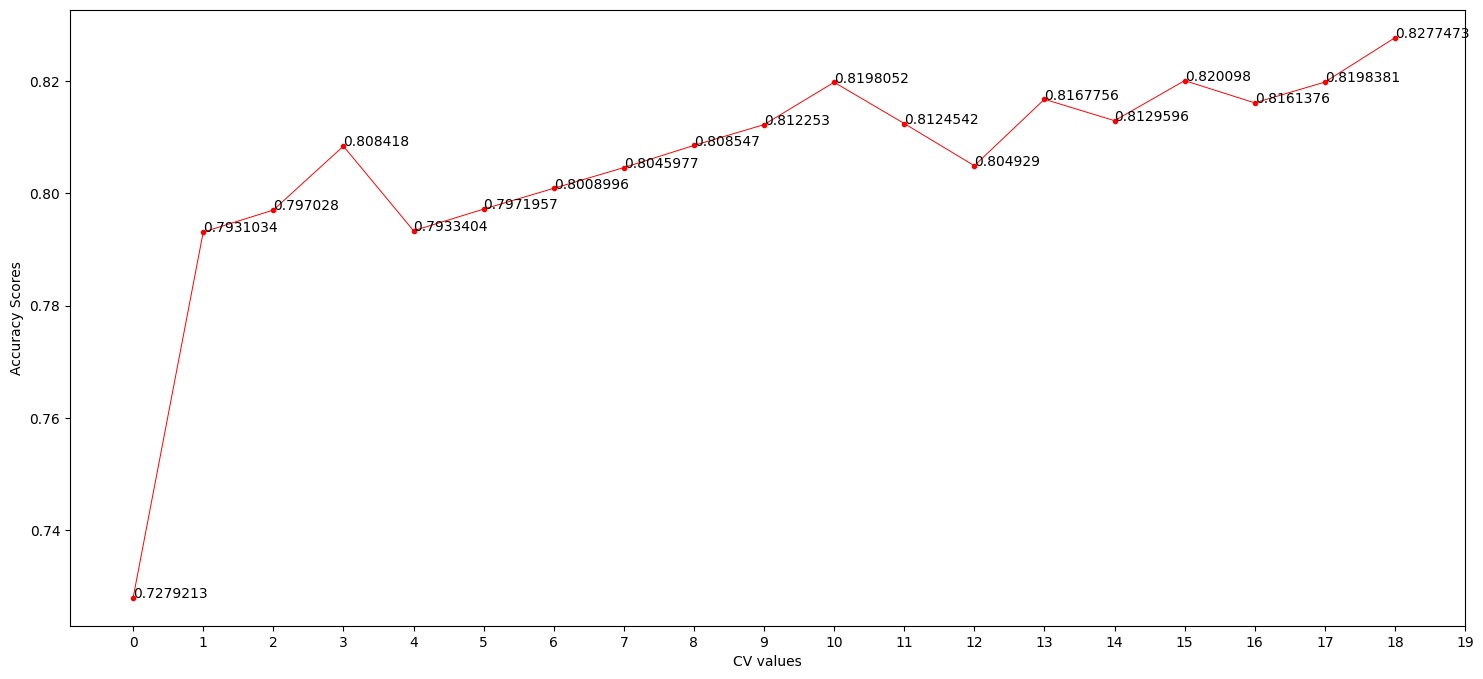

In [83]:
log_arr = []  # initialising array
for i in range(2, 21):  # for loop till 20
    log_range_score = cross_val_score(log_clf, X, y, cv=i)  #cv score for all values of i
    log_arr.append(log_range_score.mean()) # appending the mean cv into the array
plt.figure(figsize=(18,8))  # figure size of the plor
plt.plot(log_arr, marker='.', color='red', linewidth=.7)  # plotting the line chart
for i, score in enumerate(log_arr):  # traversing through the array 
    plt.text(i, score, str(round(score, 7)))  # writing up the scores of each values of i
plt.xticks([i-1 for i in range(1, 21)])  # giving x-axis lable
plt.xlabel("CV values")  # x-axis name
plt.ylabel("Accuracy Scores") # y-axis name


In [45]:
confusion_matrix(y_test, log_test_pred) # seeing how many datas have given wrong output

array([[27,  6],
       [ 8, 12]], dtype=int64)